<a href="https://colab.research.google.com/github/SachkovaYuliia/data-analysis/blob/main/DA_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

DATA_PATH = 'clean_data2.csv'

df = pd.read_csv(DATA_PATH, sep=',', encoding='cp1252')

print(df.head())


Saving clean_data2.csv to clean_data2.csv
User uploaded file "clean_data2.csv" with length 19632 bytes
     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746  34656032.0   
1         Albania       Europe & Central Asia     4124.982390   2876101.0   
2         Algeria  Middle East & North Africa     3916.881571  40606052.0   
3  American Samoa         East Asia & Pacific    11834.745230     55599.0   
4         Andorra       Europe & Central Asia    36988.622030     77281.0   

    CO2 emission     Area  Population density  
0    9809.225000   652860           53.083405  
1    5716.853000    28750          100.038296  
2  145400.217000  2381740           17.048902  
3  165114.116337      200          277.995000  
4     462.042000      470          164.427660  


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>ознака 1</li>
    <li>ознака 2</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression

# Використовую дані для навчання
X_m1 = df[['Population', 'Area']]
y_m1 = df['CO2 emission']

# Створюю і навчаю модель
model1 = LinearRegression()
model1.fit(X_m1, y_m1)

LinearRegression()

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
slope = model1.coef_
intercept = model1.intercept_

print(f"Коефіцієнт для Population: {slope[0]}")
print(f"Коефіцієнт для Area: {slope[1]}")

print(f"Вільний коефіцієнт (intercept): {intercept}")


Коефіцієнт для Population: 0.0040708678907229725
Коефіцієнт для Area: 0.12369061992486786
Вільний коефіцієнт (intercept): -51153.70055281371


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно
CO2_emission =  -59645.76993886774 + 0.0040756155768119145 * Population +  0.12570669969132217 * Area

Створюю об’єкт лінійної регресії та навчаю другу модель


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

# Використовую дані для навчання
X2_m2 = df[['Population', 'Area', 'GDP per capita']]
y2_m2 = df['CO2 emission']

# Створюю і навчаю модель
model2 = LinearRegression()
model2.fit(X2_m2, y2_m2)



LinearRegression()

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
slope2 = model2.coef_
intercept2 = model2.intercept_


print(f"Коефіцієнт для Population: {slope2[0]}")
print(f"Коефіцієнт для Area: {slope2[1]}")
print(f"Коефіцієнт для GDP per capita: {slope2[2]}")

print(f"Вільний коефіцієнт (intercept): {intercept2}")




Коефіцієнт для Population: 0.004131819644511584
Коефіцієнт для Area: 0.11869302168760835
Коефіцієнт для GDP per capita: 5.028298333587618
Вільний коефіцієнт (intercept): -117761.44157259038


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно
CO2_emission =  -124419.36351769892 + 0.004135823222596275 * Population + 0.1203045571869629 * Area + 5.024976952932476 * GDP per capita

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression
import pandas as pd

# Заповнюю порожні значення лише для числових стовпців
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Використовую дані для навчання
X_m3 = df[['Population', 'Area', 'GDP per capita', 'Population density']]
y_m3 = df['CO2 emission']

# Створюю і навчаю модель
model3 = LinearRegression()
model3.fit(X_m3, y_m3)


LinearRegression()

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

slope3 = model3.coef_
intercept3 = model3.intercept_

print(f"Коефіцієнт для Population: {slope3[0]}")
print(f"Коефіцієнт для Area: {slope3[1]}")
print(f"Коефіцієнт для GDP per capita: {slope3[2]}")
print(f"Коефіцієнт для Population Density: {slope3[3]}")
print(f"Вільний коефіцієнт (intercept): {intercept3}")


Коефіцієнт для Population: 0.004135446530223535
Коефіцієнт для Area: 0.12051520170444113
Коефіцієнт для GDP per capita: 4.726512894400639
Коефіцієнт для Population Density: -0.062260495704046105
Вільний коефіцієнт (intercept): -122560.18127809622


Підставляючи фактичні значення, маємо:

In [ ]:
# Напишіть рівняння моделі, виконувати не потрібно
CO2_emission =  -122560.18127809622 + -0.062260495704046105 * Population +  0.12051520170444113 * Area + 4.726512894400639 * GDP per capita + -0.062260495704046105 *  Population Density

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures

X_m4 = df[['Population']]
y_m4 = df['CO2 emission']

poly = PolynomialFeatures(degree=2)
X_poly_m4 = poly.fit_transform(X_m4)

model4 = LinearRegression()

model4.fit(X_poly_m4, y_m4)

slope4 = model4.coef_
intercept4 = model4.intercept_

print(f"Коефіцієнт для X: {slope4[1]}")
print(f"Коефіцієнт для X^2: {slope4[2]}")
print(f"Вільний коефіцієнт (intercept): {intercept4}")




Коефіцієнт для X: 0.00521002068453103
Коефіцієнт для X^2: -3.004003296114277e-13
Вільний коефіцієнт (intercept): -7948.179706594819


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
X2_m5 = df[['Area']]
y_m5 = df['CO2 emission']

poly = PolynomialFeatures(degree=2)
X2_poly_m5 = poly.fit_transform(X2_m5)

model5 = LinearRegression()

model5.fit(X2_poly_m5, y_m5)

slope5 = model5.coef_
intercept5 = model5.intercept_

print(f"Коефіцієнт для X2: {slope5[1]}")
print(f"Коефіцієнт для X2^2: {slope5[2]}")
print(f"Вільний коефіцієнт (intercept): {intercept5}")

Коефіцієнт для X2: 0.43595341053373465
Коефіцієнт для X2^2: -1.4843209272807911e-08
Вільний коефіцієнт (intercept): -49626.50272167797


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_m6 = df[['Population', 'Area']]
y_m6 = df['CO2 emission']

poly_m6 = PolynomialFeatures(degree=2, interaction_only=False)
X_poly_m6 = poly_m6.fit_transform(X_m6)

model6 = LinearRegression()
model6.fit(X_poly_m6, y_m6)

slope6 = model6.coef_
intercept6 = model6.intercept_

print(f"Коефіцієнт для Population: {slope6[1]}")
print(f"Коефіцієнт для Area: {slope6[2]}")
print(f"Коефіцієнт для взаємодії X1*X2: {slope6[3]}")
print(f"Коефіцієнт для X1^2: {slope6[4]}")
print(f"Коефіцієнт для X2^2: {slope6[5]}")

print(f"Вільний коефіцієнт (intercept): {intercept6}")


Коефіцієнт для Population: 0.002269715936730399
Коефіцієнт для Area: 0.021920434826170714
Коефіцієнт для взаємодії X1*X2: -3.110584272797423e-12
Коефіцієнт для X1^2: 1.0201134034461121e-09
Коефіцієнт для X2^2: -4.106098340206901e-09
Вільний коефіцієнт (intercept): 13674.972519003117


<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


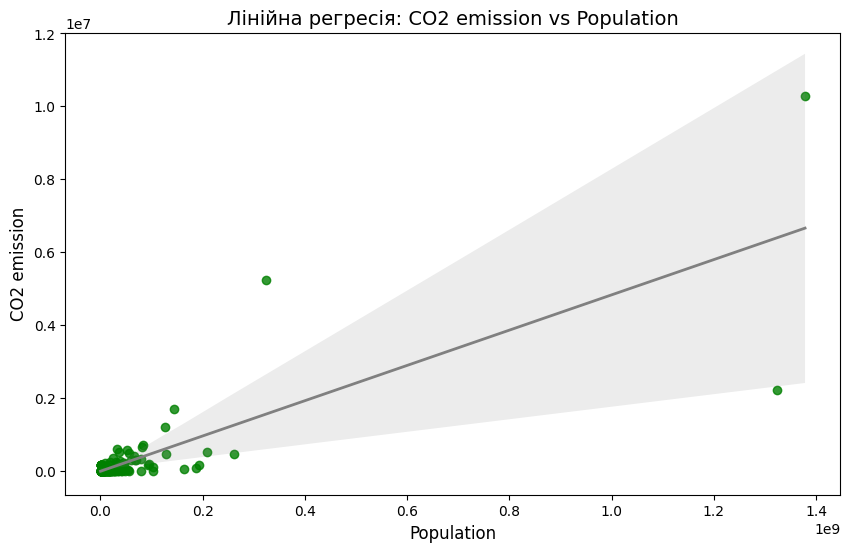

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

X = df[['Population']]
y = df['CO2 emission']

plt.figure(figsize=(10,6))
sns.regplot(x='Population', y='CO2 emission', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'grey', 'linewidth': 2})

plt.title('Лінійна регресія: CO2 emission vs Population', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('CO2 emission', fontsize=12)

plt.show()


Для візуалізації дисперсії даних використаю діаграми залишків - по ній зможу прийняти рішення про необхідність ускладнення моделі.


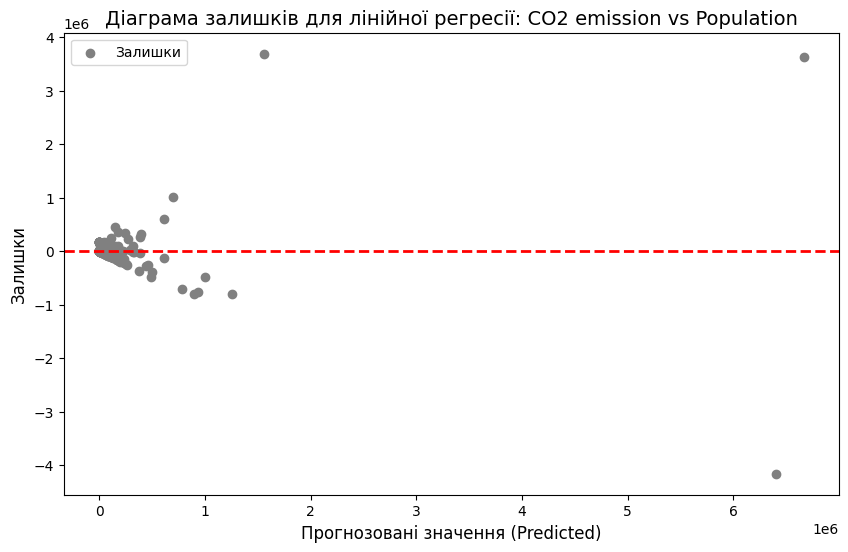

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = df[['Population']]
y = df['CO2 emission']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='grey', label='Залишки')

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Діаграма залишків для лінійної регресії: CO2 emission vs Population', fontsize=14)
plt.xlabel('Прогнозовані значення (Predicted)', fontsize=12)
plt.ylabel('Залишки', fontsize=12)

plt.legend()
plt.show()



Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


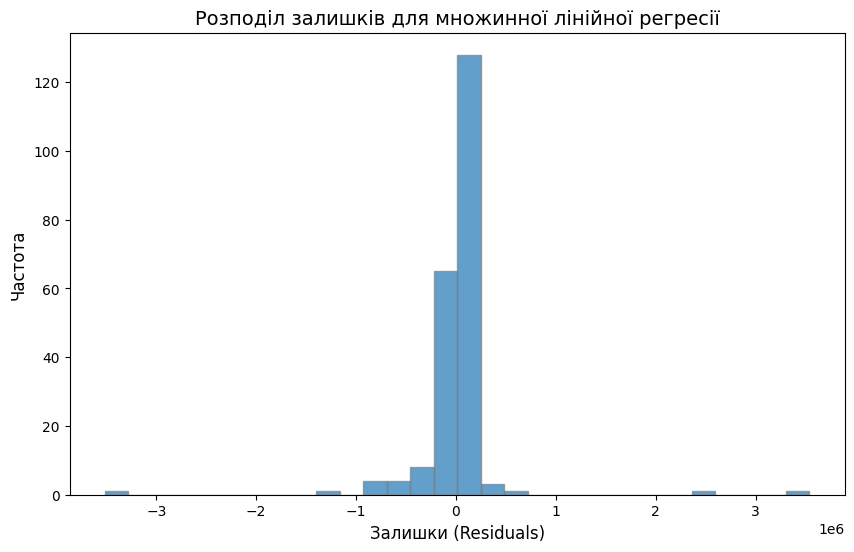

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[['Population', 'Area', 'GDP per capita']]
y = df['CO2 emission']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, edgecolor='grey', alpha=0.7)

plt.title('Розподіл залишків для множинної лінійної регресії', fontsize=14)
plt.xlabel('Залишки (Residuals)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.show()



Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>. Зручно розміщувати всі моделі на одному графіку для обрання найкращої.


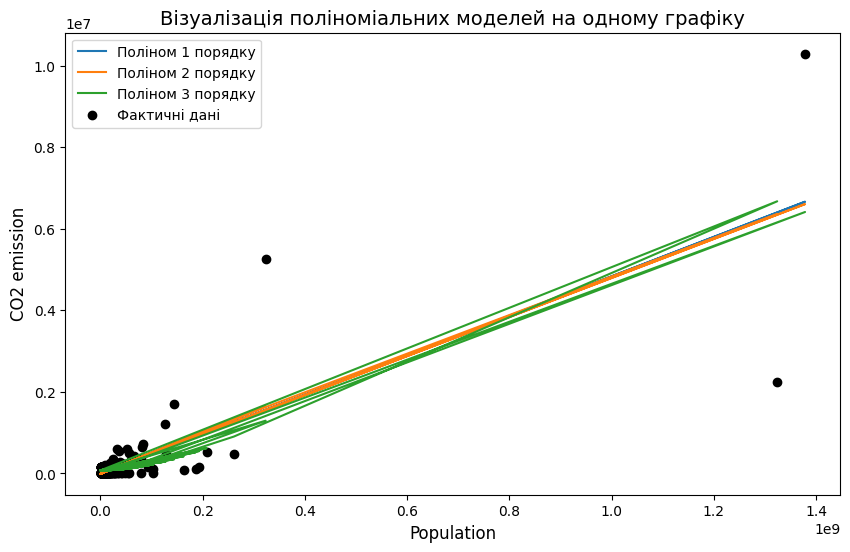

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
X = df[['Population']]
y = df['CO2 emission']

model = LinearRegression()

degrees = [1, 2, 3]
plt.figure(figsize=(10, 6))

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    plt.plot(X, y_poly_pred, label=f'Поліном {degree} порядку')

plt.scatter(X, y, color='black', label='Фактичні дані')

plt.title('Візуалізація поліноміальних моделей на одному графіку', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('CO2 emission', fontsize=12)
plt.legend()

plt.show()


Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


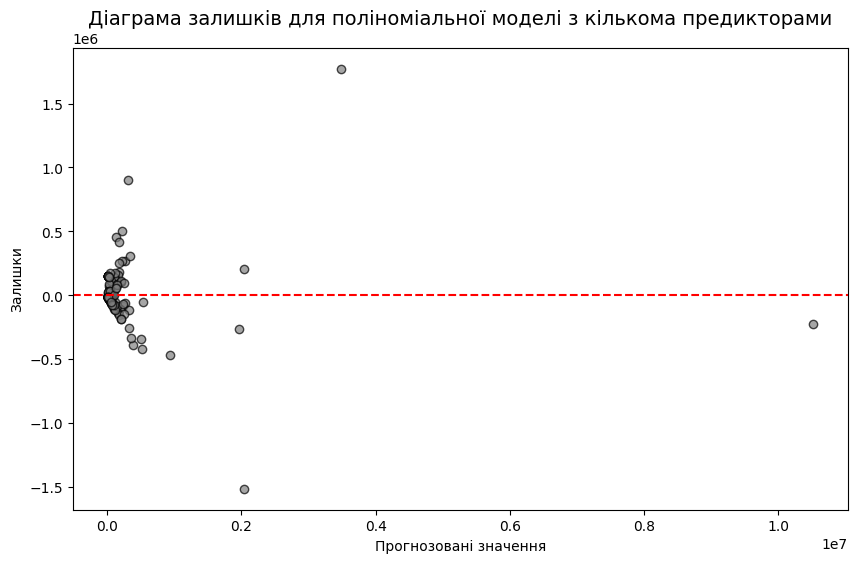

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
X = df[['Population', 'Area']]
y = df['CO2 emission']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='grey', edgecolor='black', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Діаграма залишків для поліноміальної моделі з кількома предикторами', fontsize=14)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.show()


<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.metrics import mean_squared_error

import sklearn
print(sklearn.__version__)

r2_model1 = model.score(X_m1, y_m1)
print(f"R^2 для Моделі 1: {r2_model1}")

y_pred_model1 = model.predict(X_m1)

mse_model1 = mean_squared_error(y_m1, y_pred_model1)
print(f"MSE для Моделі 1: {mse_model1}")


1.6.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 6 features as input.

Модель 2:
$$
Yhat2 = a + b  X
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r2_model2 = model2.score(X2_m2, y2_m2)
print(f"R^2 для Моделі 2: {r2_model2}")

y_pred_model2 = model2.predict(X2_m2)

mse_model2 = mean_squared_error(y2_m2, y_pred_model2)
print(f"MSE для Моделі 2: {mse_model2}")



R^2 для Моделі 2: 0.7162970600591227
MSE для Моделі 2: 185303098279.43036


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r2_model3 = model3.score(X_m3, y_m3)
print(f"R^2 для Моделі 3: {r2_model3}")

y_pred_model3 = model3.predict(X_m3)

mse_model3 = mean_squared_error(y_m3, y_pred_model3)
print(f"MSE для Моделі 3: {mse_model3}")

R^2 для Моделі 3: 0.7199361758240574
MSE для Моделі 3: 183282260498.779


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [ ]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

r2_model4 = model4.score(X_poly_m4, y_m4)
print(f"R^2 для Моделі 4: {r2_model4}")

y_pred_model4 = model4.predict(X_poly_m4)
r2_model4_alternative = r2_score(y_m4, y_pred_model4)
print(f"R^2 для Моделі 4 (перевірка): {r2_model4_alternative}")

mse_model4 = mean_squared_error(y_m4, y_pred_model4)
print(f"MSE для Моделі 4: {mse_model4}")


R^2 для Моделі 4: 0.647299971917161
R^2 для Моделі 4 (перевірка): 0.647299971917161
MSE для Моделі 4: 230817595293.5461


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r2_model5 = model5.score(X2_poly_m5, y_m5)
print(f"R^2 для Моделі 5: {r2_model5}")

y_pred_model5 = model5.predict(X2_poly_m5)
r2_model5_alternative = r2_score(y_m5, y_pred_model5)
print(f"R^2 для Моделі 5 (перевірка): {r2_model5_alternative}")

mse_model5 = mean_squared_error(y_m5, y_pred_model5)
print(f"MSE для Моделі 5: {mse_model5}")



R^2 для Моделі 5: 0.377533962529784
R^2 для Моделі 5 (перевірка): 0.377533962529784
MSE для Моделі 5: 407360653475.85486


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r2_model6 = model6.score(X_poly_m6, y_m6)
print(f"R^2 для Моделі 6: {r2_model6}")

y_pred_model6 = model6.predict(X_poly_m6)
r2_model6_alternative = r2_score(y_m6, y_pred_model6)
print(f"R^2 для Моделі 6 (перевірка): {r2_model6_alternative}")

mse_model6 = mean_squared_error(y_m6, y_pred_model6)
print(f"MSE для Моделі 6: {mse_model6}")


R^2 для Моделі 6: 0.9382681079914046
R^2 для Моделі 6 (перевірка): 0.9382681079914046
MSE для Моделі 6: 40399222375.446594


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель .... є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей (зручно розміщувати всі моделі на одному графіку для обрання найкращої).
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі (теж доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі).
4. Оберіть найкращу модель, висновок обгрунтуйте.


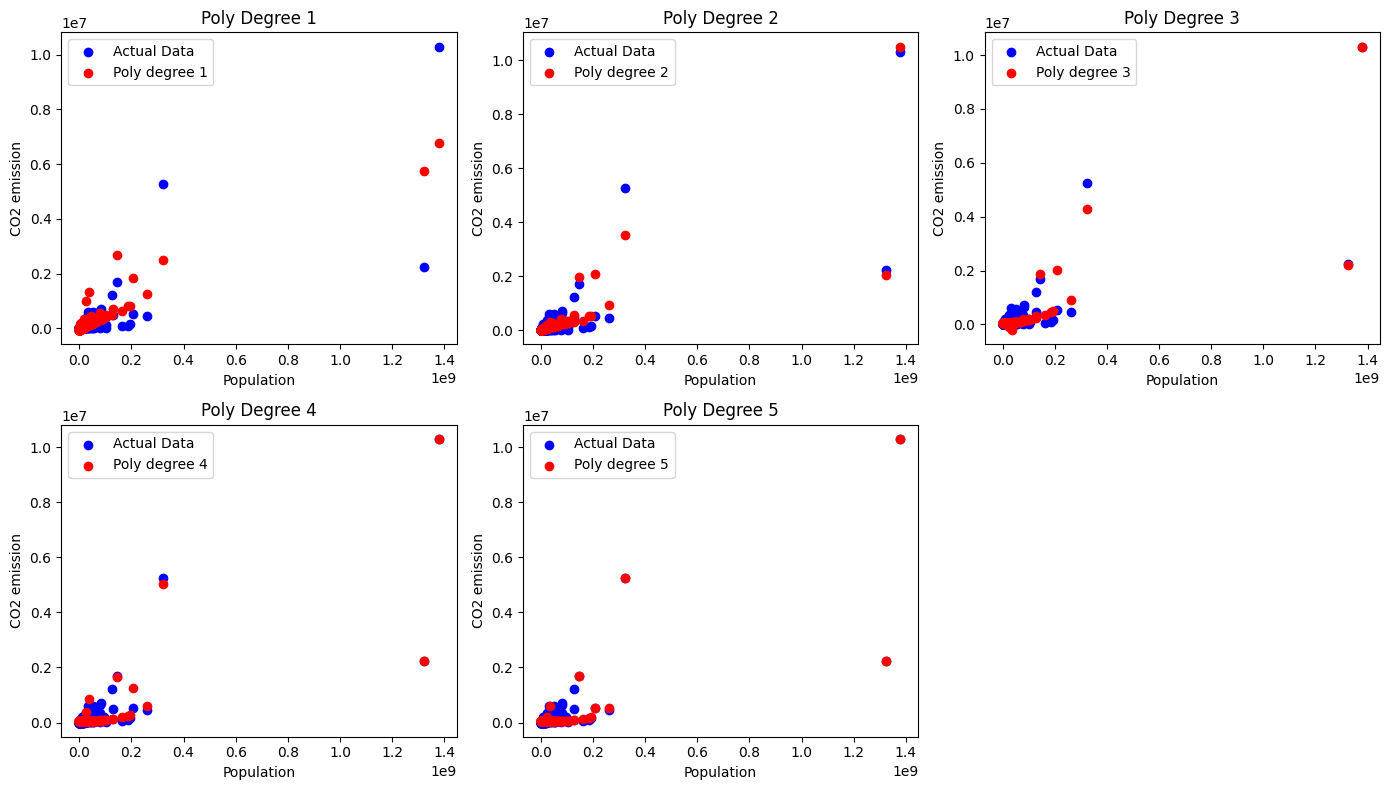

Поліноміальний порядок 1:
 R^2: 0.7103367214897585
 MSE: 189564434553.64664
------------------------------
Поліноміальний порядок 2:
 R^2: 0.9382681079914046
 MSE: 40399222375.446594
------------------------------
Поліноміальний порядок 3:
 R^2: 0.9463363427760789
 MSE: 35119124833.67697
------------------------------
Поліноміальний порядок 4:
 R^2: 0.9674642430568353
 MSE: 21292386109.231422
------------------------------
Поліноміальний порядок 5:
 R^2: 0.9711105640056104
 MSE: 18906123092.356716
------------------------------


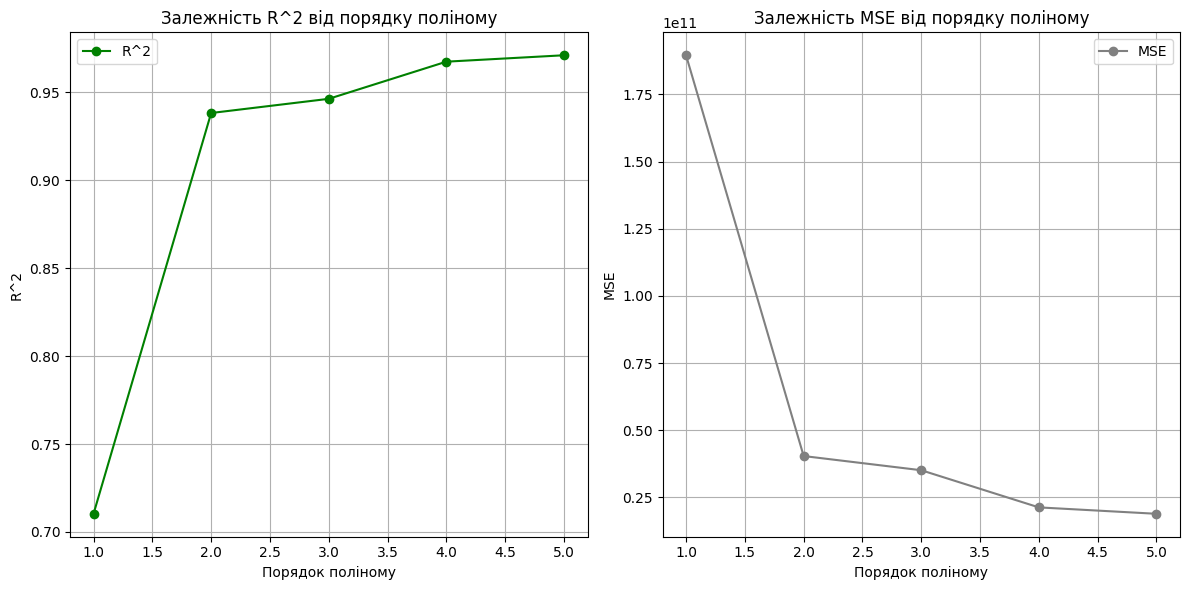

Найкраща модель з порядком поліному 5, оскільки вона дає найвищий R^2.


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Population', 'Area']]
y = df['CO2 emission']

r2_values = []
mse_values = []

degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(14, 8))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)
    r2_values.append(r2)

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    plt.subplot(2, 3, degrees.index(degree) + 1)
    plt.scatter(df['Population'], df['CO2 emission'], color='blue', label='Actual Data')
    plt.scatter(df['Population'], y_pred, color='red', label=f'Poly degree {degree}')
    plt.title(f'Poly Degree {degree}')
    plt.xlabel('Population')
    plt.ylabel('CO2 emission')
    plt.legend()

plt.tight_layout()
plt.show()

for degree, r2, mse in zip(degrees, r2_values, mse_values):
    print(f"Поліноміальний порядок {degree}:")
    print(f" R^2: {r2}")
    print(f" MSE: {mse}")
    print("-" * 30)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(degrees, r2_values, marker='o', color='green', label='R^2')
plt.title('Залежність R^2 від порядку поліному')
plt.xlabel('Порядок поліному')
plt.ylabel('R^2')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, mse_values, marker='o', color='grey', label='MSE')
plt.title('Залежність MSE від порядку поліному')
plt.xlabel('Порядок поліному')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

best_degree = degrees[np.argmax(r2_values)]
print(f"Найкраща модель з порядком поліному {best_degree}, оскільки вона дає найвищий R^2.")

